In [1]:
import pandas as pd

df = pd.read_csv('amazon-reviews.csv', engine='python')
display(
    df.head(),
    df.info(),
    df.describe()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21214 entries, 0 to 21213
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Reviewer Name       21214 non-null  object
 1   Profile Link        21163 non-null  object
 2   Country             21054 non-null  object
 3   Review Count        21055 non-null  object
 4   Review Date         21055 non-null  object
 5   Rating              21055 non-null  object
 6   Review Title        21055 non-null  object
 7   Review Text         21055 non-null  object
 8   Date of Experience  20947 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024"
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024"
2,p fisher,/users/546cfcf1000064000197b88f,GB,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024"
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024"
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024"


None

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
count,21214,21163,21054,21055,21055,21055,21055,21055,20947
unique,18531,21156,148,177,21054,5,19277,20407,3640
top,customer,"January 21, 2012",US,1 review,2022-10-05T12:13:39.000Z,Rated 1 out of 5 stars,Excellent,Review text not found,"January 11, 2021"
freq,72,3,9286,5761,2,13123,52,630,32


In [2]:
#cleaning the data

_df = df.copy()

#drop rows with missing values
_df.dropna(inplace=True)

#drop unnecessary columns
_df = _df.drop(['Country','Review Date','Reviewer Name','Profile Link','Review Count','Date of Experience'], axis=1)

# extract numerical value
_df['Rating'] = _df['Rating'].astype(str).str.extract(r'(\d)').fillna(0).astype(int)

# remove punctuation
_df['Review Text'] = _df['Review Text'].str.replace(r'[^\w\s]', '', regex=True)

display(
    _df.head(),
    _df.info(),
    _df.describe()
)

<class 'pandas.core.frame.DataFrame'>
Index: 20946 entries, 0 to 21213
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rating        20946 non-null  int32 
 1   Review Title  20946 non-null  object
 2   Review Text   20946 non-null  object
dtypes: int32(1), object(2)
memory usage: 572.7+ KB


,Rating,Review Title,Review Text
0,1,A Store That Doesn't Want to Sell Anything,I registered on the website tried to order a l...
1,1,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...
2,1,I informed these reprobates,I informed these reprobates that I WOULD NOT B...
3,1,Advertise one price then increase it on website,I have bought from Amazon before and no proble...
4,1,If I could give a lower rate I would,If I could give a lower rate I would I cancell...


None

,Rating
count,20946.000000
mean,2.174305
std,1.671130
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,5.000000


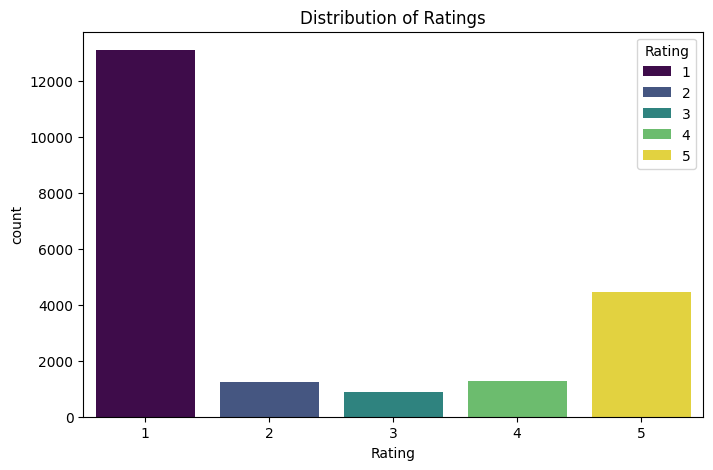

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=_df, hue='Rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.show()

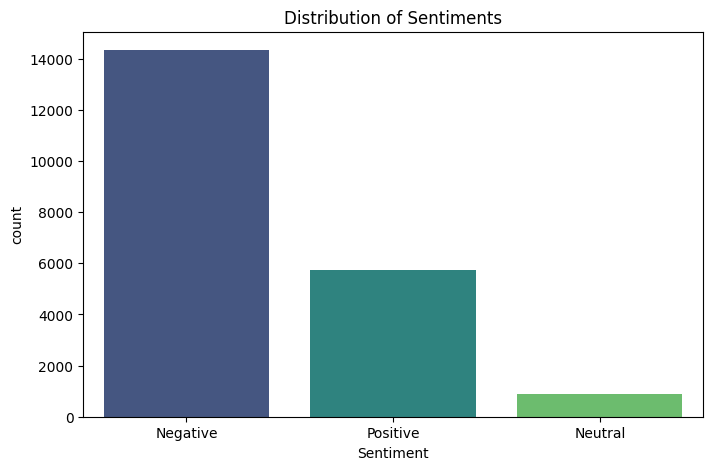

In [4]:
def categorize_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

_df['Sentiment'] = _df['Rating'].apply(categorize_sentiment)

plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=_df, hue='Sentiment', palette='viridis')
plt.title('Distribution of Sentiments')
plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# TFIDF vectorization
vectorizer = TfidfVectorizer()

# split data into training and testing sets
X = vectorizer.fit_transform(_df['Review Text'])
y = _df['Sentiment']
#y = _df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# inspect the features
#_features=vectorizer.get_feature_names_out()
#print(len(_features), _features[:10], _features[-10:])

# using logistic regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [6]:
# predict sentiments
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:  0.9021479713603818
              precision    recall  f1-score   support

    Negative       0.91      0.97      0.94      2884
     Neutral       0.60      0.02      0.03       182
    Positive       0.87      0.87      0.87      1124

    accuracy                           0.90      4190
   macro avg       0.80      0.62      0.61      4190
weighted avg       0.89      0.90      0.88      4190

Confusion Matrix:
 [[2804    0   80]
 [ 116    3   63]
 [ 149    2  973]]


In [80]:
_df_neutral = _df[_df['Sentiment'] == 'Neutral'][:5]
display(_df_neutral)
y_neutral_pred = log_reg.predict_proba(vectorizer.transform(_df_neutral['Review Text']))
print(y_neutral_pred)

,Rating,Review Title,Review Text,Sentiment
39,3,They should verify what sellers are…,They should verify what sellers are selling a ...,Neutral
86,3,Yesterday I bought kids rubberband for…,Yesterday I bought kids rubberband for 280 rsT...,Neutral
118,3,average,average The design of website is not very simp...,Neutral
129,3,Bad Amazon sellers,Ferreteria Lepanto order number 40860985727581...,Neutral
133,3,Minimum spend is a joke,I like Amazon It has a lot of selection and yo...,Neutral


[[0.81712549 0.11463787 0.06823664]
 [0.45060436 0.23121023 0.31818541]
 [0.25946973 0.25343819 0.48709208]
 [0.76666459 0.12567417 0.10766125]
 [0.36553167 0.36670807 0.26776027]]


In [7]:
_df_test = pd.DataFrame({
    'Review Text': [
        "This product is great!",
        "I didn't like this product at all.",
        "It's okay, not the best but not the worst, in the average range of similar products.",
        "Absolutely fantastic! Highly recommend.",
        "Would not buy again."
    ],
    'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative']
})
_test_predict= log_reg.predict(vectorizer.transform(_df_test['Review Text']))
display(_test_predict)
print("Accuracy: ", accuracy_score(_df_test['Sentiment'], _test_predict))
print(classification_report(_df_test['Sentiment'], _test_predict))
print("Confusion Matrix:\n", confusion_matrix(_df_test['Sentiment'], _test_predict))

array(['Positive', 'Negative', 'Neutral', 'Positive', 'Negative'],
      dtype=object)

Accuracy:  1.0
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         2
     Neutral       1.00      1.00      1.00         1
    Positive       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Confusion Matrix:
 [[2 0 0]
 [0 1 0]
 [0 0 2]]
